In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('edwin_final_data.csv')

In [39]:
df=df.drop(columns='Unnamed: 0')
df.head()

,air_area_name,genre_name,visitors,current_week,day_of_week,holidays,latitude,longitude
0,Tōkyō-to Minato-ku Shibakōen,Dining bar,6,0,Monday,0,35.658068,139.751599
1,Tōkyō-to Minato-ku Shibakōen,Izakaya,12,0,Monday,0,35.658068,139.751599
2,Tōkyō-to Minato-ku Shibakōen,Dining bar,6,0,Monday,0,35.658068,139.751599
3,Tōkyō-to Minato-ku Shibakōen,Italian/French,3,0,Monday,0,35.658068,139.751599
4,Tōkyō-to Minato-ku Shibakōen,Izakaya,6,0,Monday,0,35.658068,139.751599


In [40]:

ic_air_ml_df = df.loc[df["visitors"]==0]
ic_air_ml_df.head(5)

remove_area = ['Hokkaidō Katō-gun Motomachi',
 'Niigata-ken Kashiwazaki-shi Chūōchō',
 'Fukuoka-ken Fukuoka-shi Tenjin',
 'Tōkyō-to Meguro-ku Takaban',
 'Tōkyō-to Chiyoda-ku Kanda Jinbōchō',
 'Tōkyō-to Musashino-shi Midorichō',
 'Tōkyō-to Adachi-ku Chūōhonchō',
 'Tōkyō-to Kōtō-ku Tomioka',
 'Hokkaidō Sapporo-shi Atsubetsuchūō 1 Jō',
 'Tōkyō-to Edogawa-ku Chūō',
 'Hokkaidō Sapporo-shi Kita 24 Jōnishi',
 'Tōkyō-to Fuchū-shi Miyanishichō',
 'Ōsaka-fu Ōsaka-shi Ōhiraki',
 'Niigata-ken Niigata-shi Teraohigashi',
 'Ōsaka-fu Ōsaka-shi Nanbasennichimae',
 'Fukuoka-ken Kitakyūshū-shi Konyamachi',
 'Hyōgo-ken Amagasaki-shi Higashinanamatsuchō',
 'Tōkyō-to Musashino-shi Kichijōji Honchō',
 'Tōkyō-to Taitō-ku Asakusa',
 'Ōsaka-fu Suita-shi Izumichō',
 'Tōkyō-to Toshima-ku Sugamo',
 'Tōkyō-to Meguro-ku Jiyūgaoka',
 'Fukuoka-ken Fukuoka-shi Imaizumi',
 'Tōkyō-to Shibuya-ku Higashi',
 'Tōkyō-to Setagaya-ku Kitazawa']

In [41]:
for area in remove_area:
    df = df[df.air_area_name != area]

In [42]:
#Normalizes values in a list (weak against large outliers)
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = []
    for val in lst:
        normalized.append((val-minimum)/(maximum-minimum))
    return normalized

In [43]:
# group = df.groupby(['current_week', 'air_area_name','genre_name', 'day_of_week'])
group = df.groupby(['current_week','day_of_week','air_area_name'])
df = pd.DataFrame(group['visitors'].sum())
df = df.reset_index()
df.head()

,current_week,day_of_week,air_area_name,visitors
0,0,Friday,Fukuoka-ken Fukuoka-shi Daimyō,435
1,0,Friday,Fukuoka-ken Fukuoka-shi Hakata Ekimae,99
2,0,Friday,Fukuoka-ken Fukuoka-shi Momochi,53
3,0,Friday,Fukuoka-ken Fukuoka-shi Shiobaru,85
4,0,Friday,Fukuoka-ken Fukuoka-shi Takatori,14


In [44]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
#df['visit_date'] = number.fit_transform(area_df["visit_date"].astype('str'))
df["day_of_week"] = df['day_of_week'].map({'Monday': 1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7 })
# df["genre_name"] = number.fit_transform(df["genre_name"].astype('str'))
df["encode_air_area_name"] = number.fit_transform(df["air_area_name"].astype('str'))

df.head()

,current_week,day_of_week,air_area_name,visitors,encode_air_area_name
0,0,5,Fukuoka-ken Fukuoka-shi Daimyō,435,0
1,0,5,Fukuoka-ken Fukuoka-shi Hakata Ekimae,99,1
2,0,5,Fukuoka-ken Fukuoka-shi Momochi,53,2
3,0,5,Fukuoka-ken Fukuoka-shi Shiobaru,85,3
4,0,5,Fukuoka-ken Fukuoka-shi Takatori,14,4


In [46]:
encode_df = df[["air_area_name","encode_air_area_name"]]
encode_df.head()

,air_area_name,encode_air_area_name
0,Fukuoka-ken Fukuoka-shi Daimyō,0
1,Fukuoka-ken Fukuoka-shi Hakata Ekimae,1
2,Fukuoka-ken Fukuoka-shi Momochi,2
3,Fukuoka-ken Fukuoka-shi Shiobaru,3
4,Fukuoka-ken Fukuoka-shi Takatori,4


In [52]:
encode_df.to_csv("encodedJP.csv")

In [61]:
jp_area = list(encode_df["air_area_name"].unique())
jp_encode = list(encode_df["encode_air_area_name"].unique())
new_jp_list = ({
    "area_name": jp_area,
    "encode_area": jp_encode
})
new_jp_df= pd.DataFrame.from_dict(new_jp_list)
new_jp_df.to_csv("encode_unique.csv")

In [49]:
new_jp_data = df.drop(columns = "air_area_name")


In [50]:
new_jp_data

,current_week,day_of_week,visitors,encode_air_area_name
0,0,5,435,0
1,0,5,99,1
2,0,5,53,2
3,0,5,85,3
4,0,5,14,4
5,0,5,65,5
6,0,5,8,6
7,0,5,79,7
8,0,5,61,8
9,0,5,72,9


In [51]:
new_jp_data.to_csv("final_data06282019.csv")

In [319]:
y = df['visitors']
X = df.drop(columns= 'visitors')
X = X.values
X

array([[ 0,  5,  0],
       [ 0,  5,  1],
       [ 0,  5,  2],
       ...,
       [52,  3, 75],
       [52,  3, 76],
       [52,  3, 77]], dtype=int64)

In [320]:
# #Normalize values in df
# new_dict = {}

# for id in df.columns:
#     new_dict[id] = min_max_normalize(df[id])
        
# #create normalized df
# new_df = pd.DataFrame(new_dict)

# new_df.head()

In [321]:
from sklearn.model_selection import train_test_split
#split data to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [322]:
from sklearn.neighbors import KNeighborsRegressor
#create regeressor 
regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')

In [323]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [324]:
#predict training
#predict = regressor.predict(X_train)

In [325]:
test_predict = regressor.predict(X_test)

In [326]:
#Test R2
regressor.score(X_test, y_test)

0.6794699336133883

k: 1, Train/Test Score: 1.000/0.386
k: 3, Train/Test Score: 0.808/0.671
k: 5, Train/Test Score: 0.787/0.655
k: 7, Train/Test Score: 0.698/0.573
k: 9, Train/Test Score: 0.616/0.526
k: 11, Train/Test Score: 0.561/0.480
k: 13, Train/Test Score: 0.519/0.442
k: 15, Train/Test Score: 0.486/0.414
k: 17, Train/Test Score: 0.455/0.390
k: 19, Train/Test Score: 0.430/0.378


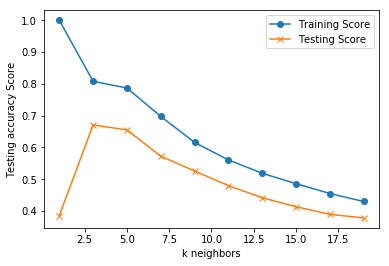

In [327]:
#Check for optimal k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o',label="Training Score")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="Testing Score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.savefig('Kneighbors.jpg')
plt.show()


In [328]:
pd.DataFrame({"Predicted": test_predict[200:300], "Actual": y[200:300], "Error": test_predict[200:300] - y[200:300]})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
200,77.497789,33,44.497789
201,82.600000,22,60.600000
202,193.800000,515,-321.200000
203,114.600000,9,105.600000
204,92.387367,223,-130.612633
205,41.600000,10,31.600000
206,193.775048,156,37.775048
207,150.528865,30,120.528865
208,138.984902,30,108.984902
209,15.400000,34,-18.600000


In [339]:
cw_input = 100
dow_input = 6
an_input = 15

new_data = [[cw_input,dow_input,an_input]]

In [345]:
new_predict = int(regressor.predict(new_data))
new_predict

212